## W207 Final Project
#### Authors: Alexandre Baude, Audrey Lei, Allison Schlissel, Vinod Viswanathan, Madeline Whitlow
#### Date: 12/08/21

In [1]:
#Library Import

import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
import sys
from PIL import Image, ImageOps
from pathlib import Path
from keras.preprocessing.image import img_to_array

from keras.datasets import mnist
import numpy as np
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
import sys
from PIL import Image, ImageOps
from pathlib import Path

from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.utils import to_categorical

import tensorflow as tf

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
from tensorflow.keras.regularizers import l2

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten 
from keras.layers import MaxPooling2D, Dropout

from scipy.ndimage import gaussian_filter


# Data Cleaning, Processing and Functions

In [2]:
# importing and resizing image data 
# change path to wherever your data lives on your computer
csv_path = "../petfinder-pawpularity-score/train.csv"
image_path = '../petfinder-pawpularity-score/train/'

def CutenessBuckets(pawpularity_score):
    '''
    Function that returns 1 of 10 digits (0-9), bucketting by equal division.
    '''
    if pawpularity_score <= 10:
        return 0
    elif pawpularity_score <= 20:
        return 1
    elif pawpularity_score <= 30:
        return 2
    elif pawpularity_score <= 40:
        return 3
    elif pawpularity_score <= 50:
        return 4
    elif pawpularity_score <= 60:
        return 5
    elif pawpularity_score <= 70:
        return 6
    elif pawpularity_score <= 80:
        return 7
    elif pawpularity_score <= 90:
        return 8
    elif pawpularity_score <= 100:
        return 9

def CutenessBuckets_2(pawpularity_score):
    '''
    Function that returns 1 of 2 digits (0,1), bucketting by equal division.
    '''
    if pawpularity_score <= 50:
        return 0
    elif pawpularity_score <= 100:
        return 1

def CutenessBuckets_3(pawpularity_score):
    '''
    Function that returns 1 of 3 digits (0-2), bucketting by equal division.
    '''
    if pawpularity_score <= 33:
        return 0
    elif pawpularity_score <= 66:
        return 1
    elif pawpularity_score <= 100:
        return 2

def CutenessBuckets_4(pawpularity_score):
    '''
    Function that returns 1 of 4 digits (0-3), bucketting by equal division.
    '''
    if pawpularity_score <= 25:
        return 0
    elif pawpularity_score <= 50:
        return 1
    elif pawpularity_score <= 75:
        return 2
    elif pawpularity_score <= 100:
        return 3
    
def CutenessBuckets_5(pawpularity_score):
    '''
    Function that returns 1 of 5 digits (0-4), bucketting by equal division.
    '''
    if pawpularity_score <= 20:
        return 0
    elif pawpularity_score <= 40:
        return 1
    elif pawpularity_score <= 60:
        return 2
    elif pawpularity_score <= 80:
        return 3
    elif pawpularity_score <= 100:
        return 4
    
def CutenessBuckets_7(pawpularity_score):
    '''
    Function that returns 1 of 7 digits (0-6), bucketting by equal division.
    '''
    if pawpularity_score <= 15:
        return 0
    elif pawpularity_score <= 30:
        return 1
    elif pawpularity_score <= 45:
        return 2
    elif pawpularity_score <= 60:
        return 3
    elif pawpularity_score <= 75:
        return 4
    elif pawpularity_score <= 90:
        return 5
    elif pawpularity_score <= 100:
        return 6

def CutenessBuckets_2_diff_breakpoint(pawpularity_score):
    '''
    Function that returns 1 of 2 digits (0,1), bucketting by skewed division 75 - 25.
    '''
    if pawpularity_score <= 75:
        return 0
    elif pawpularity_score <= 100:
        return 1

def CleanandProcessData(csv_path, image_path, image_resize):

    # imnporting csv with image ids and pawpularity scores
    df = pd.read_csv(csv_path)

    # creating path to image using the id in the data frame we've created
    df['path'] = image_path + df['Id'] + '.jpg'
    df['img'] = df['path'].apply(lambda x: Image.open(x).convert("RGB").resize((image_resize,image_resize)))
    
    df['cuteness_bin10'] = df['Pawpularity'].apply(CutenessBuckets)
    df['cuteness_bin2'] = df['Pawpularity'].apply(CutenessBuckets_2)
    df['cuteness_bin3'] = df['Pawpularity'].apply(CutenessBuckets_3)
    df['cuteness_bin4'] = df['Pawpularity'].apply(CutenessBuckets_4)
    df['cuteness_bin5'] = df['Pawpularity'].apply(CutenessBuckets_5)
    df['cuteness_bin7'] = df['Pawpularity'].apply(CutenessBuckets_7)
    df['cuteness_bin2diff'] = df['Pawpularity'].apply(CutenessBuckets_2_diff_breakpoint)
    
    df['img_array'] = df['img'].apply(lambda x: img_to_array(x)/255)

    labels_raw=[]
    labels_bin2 = []
    #labels_bin2diff = []
    #labels_bin3 = []
    #labels_bin4 = []
    #labels_bin5 = []
    #labels_bin7 = []
    labels_bin10 = []
    tags = []
    imgArr=[]

    for ind in df.index:
        img = df.img_array[ind]
        imgArr.append(img)
        labels_raw.append(df['Pawpularity'][ind])
        labels_bin2.append(df['cuteness_bin2'][ind])
        #labels_bin2diff.append(df['cuteness_bin2diff'][ind])
        #labels_bin3.append(df['cuteness_bin3'][ind])
        #labels_bin4.append(df['cuteness_bin4'][ind])
        #labels_bin5.append(df['cuteness_bin5'][ind])
        #labels_bin7.append(df['cuteness_bin7'][ind])
        labels_bin10.append(df['cuteness_bin10'][ind])

    labels_raw = np.array(labels_raw)
    labels_bin2 = np.array(labels_bin2)
    #labels_bin2diff = np.array(labels_bin2diff)
    #labels_bin3 = np.array(labels_bin3)
    #labels_bin4 = np.array(labels_bin4)
    #labels_bin5 = np.array(labels_bin5)
    #labels_bin7 = np.array(labels_bin7)
    labels_bin10 = np.array(labels_bin10)
    
    
    
    
    X_train=np.array(imgArr, dtype=float)
    print('Training Shape:',X_train.shape)
    print('Labels Shape;', labels_raw.shape)
    return X_train, labels_raw, labels_bin2, labels_bin10

X_train, labels_raw, labels_bin2, labels_bin10 = CleanandProcessData(csv_path, image_path, 50)

Training Shape: (9912, 50, 50, 3)
Labels Shape; (9912,)


In [3]:
# Shuffling data and separating into train, test and dev sets
shuffle = np.random.permutation(np.arange(X_train.shape[0]))

X_train, labels_raw, labels_bin2, labels_bin10 = X_train[shuffle], labels_raw[shuffle], labels_bin2[shuffle],labels_bin10[shuffle]

print('data shape: ', X_train.shape)
print('pawpularity label shape:', labels_raw.shape)
print('2 bin label shape:', labels_bin2.shape)
print('10 bin label shape:', labels_bin10.shape)


# Set some variables to hold test, dev, and training data.
train_data, train_labels_raw, train_labels_bin10, train_labels_bin2 = X_train[:7921], labels_raw[:7921], labels_bin10[:7921], labels_bin2[:7921]
test_data, test_labels_raw, test_labels_bin10, test_labels_bin2 = X_train[8916:], labels_raw[8916:], labels_bin10[8916:], labels_bin2[8916:]
dev_data, dev_labels_raw, dev_labels_bin10, dev_labels_bin2 = X_train[7920:8916], labels_raw[7920:8916], labels_bin10[7920:8916], labels_bin2[7920:8916]

# raw labels (ie original pawpularity score)
test_labels_category = to_categorical(test_labels_raw)
train_labels_category = to_categorical(train_labels_raw)
dev_labels_category = to_categorical(dev_labels_raw)

# bucketed labels 
test_labels_bins_category2 = to_categorical(test_labels_bin2)
train_labels_bins_category2 = to_categorical(train_labels_bin2)
dev_labels_bins_category2 = to_categorical(dev_labels_bin2)

test_labels_bins_category10 = to_categorical(test_labels_bin10)
train_labels_bins_category10 = to_categorical(train_labels_bin10)
dev_labels_bins_category10 = to_categorical(dev_labels_bin10)


# blurred image data (optional use)
blurred_train = gaussian_filter(train_data, sigma=1)
blurred_test = gaussian_filter(test_data, sigma = 1)

print(f'Train Data Size: {train_data.shape[0]}')
print(f'Test Data Size: {test_data.shape[0]}')
print(f'Dev Data Size: {dev_data.shape[0]}')

data shape:  (9912, 50, 50, 3)
pawpularity label shape: (9912,)
2 bin label shape: (9912,)
10 bin label shape: (9912,)
Train Data Size: 7921
Test Data Size: 996
Dev Data Size: 996


# First CNN Model 

In [4]:
shape = (train_data.shape[1],train_data.shape[2], train_data.shape[3])
possible_outcomes = 101
# first model attempt (using raw pawpularity scores)
# switch out activation to 'sigmoid'
# try different pixel amounts (100x100) (20x20) etc
#try binary crosstentropy vs categorical 
#adjust epochs


model = Sequential()#add model layers
model.add(Conv2D(32, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=shape))

model.add(MaxPooling2D(pool_size=(2, 2)))
# add second convolutional layer with 20 filters
model.add(Conv2D(64, (5, 5), activation='relu'))
    
# add 2D pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
    
# flatten data
model.add(Flatten())
    
# add a dense all-to-all relu layer
model.add(Dense(1024, activation='relu'))
    
# apply dropout with rate 0.5
model.add(Dropout(0.5))
    
# soft-max layer
model.add(Dense(possible_outcomes, activation='softmax'))
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train the model

print('-'*10, 'CNN Model 1 with all Paw scores', '-'*10)
model.fit(train_data,train_labels_category, validation_data=(test_data, test_labels_category), epochs=3)
# evaluate the model
score = model.evaluate(test_data, test_labels_category, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

---------- CNN Model 1 with all Paw scores ----------
Epoch 1/3
248/248 [==============================] - 23s 49ms/step - loss: 4.3144 - accuracy: 0.0260 - val_loss: 4.2365 - val_accuracy: 0.0291
Epoch 2/3
248/248 [==============================] - 12s 47ms/step - loss: 4.2211 - accuracy: 0.0327 - val_loss: 4.2364 - val_accuracy: 0.0271
Epoch 3/3
32/32 [==============================] - 0s 10ms/step - loss: 4.2650 - accuracy: 0.0301

Test loss: 4.265021324157715
Test accuracy: 0.0301204826682806


# Same Model but using 10 category buckets for scores

In [5]:
shape = (train_data.shape[1],train_data.shape[2], train_data.shape[3])
possible_outcomes = 10
# first model attempt (using raw pawpularity scores)
# switch out activation to 'sigmoid'
# try different pixel amounts (100x100) (20x20) etc
#try binary crosstentropy vs categorical 
#adjust epochs


model = Sequential()#add model layers
model.add(Conv2D(32, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=shape))

model.add(MaxPooling2D(pool_size=(2, 2)))
# add second convolutional layer with 20 filters
model.add(Conv2D(64, (5, 5), activation='relu'))
    
# add 2D pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
    
# flatten data
model.add(Flatten())
    
# add a dense all-to-all relu layer
model.add(Dense(1024, activation='relu'))
    
# apply dropout with rate 0.5
model.add(Dropout(0.5))
    
# soft-max layer
model.add(Dense(possible_outcomes, activation='softmax'))
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train the model

print('-'*10, 'CNN Model 1 with all Paw scores', '-'*10)
model.fit(train_data,train_labels_bins_category10, validation_data=(test_data, test_labels_bins_category10), epochs=3)
# evaluate the model
score = model.evaluate(test_data, test_labels_bins_category10, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

---------- CNN Model 1 with all Paw scores ----------
Epoch 1/3
248/248 [==============================] - 13s 50ms/step - loss: 2.0456 - accuracy: 0.2623 - val_loss: 2.0123 - val_accuracy: 0.2560
Epoch 2/3
248/248 [==============================] - 12s 47ms/step - loss: 1.9975 - accuracy: 0.2670 - val_loss: 2.0109 - val_accuracy: 0.2560
Epoch 3/3
32/32 [==============================] - 0s 9ms/step - loss: 2.0077 - accuracy: 0.2550

Test loss: 2.007674217224121
Test accuracy: 0.2550200819969177


# Same Model but using 2 category buckets for scores

In [6]:
shape = (train_data.shape[1],train_data.shape[2], train_data.shape[3])
possible_outcomes = 3
# first model attempt (using raw pawpularity scores)
# switch out activation to 'sigmoid'
# try different pixel amounts (100x100) (20x20) etc
#try binary crosstentropy vs categorical 
#adjust epochs


model = Sequential()#add model layers
model.add(Conv2D(32, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=shape))

model.add(MaxPooling2D(pool_size=(2, 2)))
# add second convolutional layer with 20 filters
model.add(Conv2D(64, (5, 5), activation='relu'))
    
# add 2D pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
    
# flatten data
model.add(Flatten())
    
# add a dense all-to-all relu layer
model.add(Dense(1024, activation='relu'))
    
# apply dropout with rate 0.5
model.add(Dropout(0.5))
    
# soft-max layer
model.add(Dense(possible_outcomes, activation='softmax'))
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train the model

print('-'*10, 'CNN Model 1 with all Paw scores', '-'*10)
model.fit(train_data,train_labels_bins_category2, validation_data=(test_data, test_labels_bins_category2), epochs=3)
# evaluate the model
score = model.evaluate(test_data, test_labels_bins_category2, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

---------- CNN Model 1 with all Paw scores ----------
Epoch 1/3


ValueError: in user code:

    C:\Users\alebo\anaconda3\lib\site-packages\keras\engine\training.py:830 train_function  *
        return step_function(self, iterator)
    C:\Users\alebo\anaconda3\lib\site-packages\keras\engine\training.py:813 run_step  *
        outputs = model.train_step(data)
    C:\Users\alebo\anaconda3\lib\site-packages\keras\engine\training.py:771 train_step  *
        loss = self.compiled_loss(
    C:\Users\alebo\anaconda3\lib\site-packages\keras\engine\compile_utils.py:201 __call__  *
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\alebo\anaconda3\lib\site-packages\keras\losses.py:142 __call__  *
        losses = call_fn(y_true, y_pred)
    C:\Users\alebo\anaconda3\lib\site-packages\keras\losses.py:246 call  *
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\alebo\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper  **
        return target(*args, **kwargs)
    C:\Users\alebo\anaconda3\lib\site-packages\keras\losses.py:1630 categorical_crossentropy
        return backend.categorical_crossentropy(
    C:\Users\alebo\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\alebo\anaconda3\lib\site-packages\keras\backend.py:4827 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\alebo\anaconda3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 2) and (None, 3) are incompatible


# Second CNN Model - Using raw paw scores

In [7]:
# model from kaggle page 
# https://www.kaggle.com/alexteboul/tutorial-part-3-cnn-image-modeling-1

# this accuracy seems ot be higher we could mess around with different filters/padding etc
shape = (train_data.shape[1],train_data.shape[2], train_data.shape[3])
inputs = tf.keras.Input(shape=shape)

#start off with x just being those inputs
x = inputs

x = tf.keras.layers.Conv2D(filters = 16, kernel_size = (7,7), strides = (2,2), padding='valid', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding='same', activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (2,2), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)


x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (2,2), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3),padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs = inputs, outputs = output)

model.compile(
    loss = 'mse', 
    optimizer = 'Adam', 
    metrics = [tf.keras.metrics.RootMeanSquaredError(name="rmse"), "mae", "mape"])

data_augmentation = ImageDataGenerator(
    rotation_range = 15, 
    zoom_range = 0.15,
    width_shift_range = 0.2, 
    height_shift_range = 0.2, 
    shear_range = 0.1,
    horizontal_flip = True, 
    fill_mode = "nearest")
history = model.fit(
    data_augmentation.flow(train_data,train_labels_category,batch_size=32),
    validation_data = (test_data, test_labels_category),
    steps_per_epoch = len(train_data) // 32,
    epochs = 3
)
score = model.evaluate(test_data, test_labels_category, verbose=1)
print('Test accuracy:', score[1])

Epoch 1/3
247/247 [==============================] - 10s 37ms/step - loss: 0.5964 - rmse: 0.5944 - mae: 0.2777 - mape: 267348336.0000 - val_loss: 0.3041 - val_rmse: 0.2482 - val_mae: 0.1989 - val_mape: 190820352.0000
Epoch 2/3
247/247 [==============================] - 9s 35ms/step - loss: 0.2527 - rmse: 0.1079 - mae: 0.0354 - mape: 25563854.0000 - val_loss: 0.2506 - val_rmse: 0.1048 - val_mae: 0.0311 - val_mape: 21347316.0000
Epoch 3/3
32/32 [==============================] - 0s 6ms/step - loss: 0.2463 - rmse: 0.1014 - mae: 0.0238 - mape: 14022887.0000
Test accuracy: 0.10137657821178436


# Second CNN Model - Using 10 bucket paw scores

In [8]:
# model from kaggle page 
# https://www.kaggle.com/alexteboul/tutorial-part-3-cnn-image-modeling-1

# this accuracy seems ot be higher we could mess around with different filters/padding etc
shape = (train_data.shape[1],train_data.shape[2], train_data.shape[3])
inputs = tf.keras.Input(shape=shape)

#start off with x just being those inputs
x = inputs

x = tf.keras.layers.Conv2D(filters = 16, kernel_size = (7,7), strides = (2,2), padding='valid', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding='same', activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (2,2), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)


x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (2,2), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3),padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs = inputs, outputs = output)

model.compile(
    loss = 'mse', 
    optimizer = 'Adam', 
    metrics = [tf.keras.metrics.RootMeanSquaredError(name="rmse"), "mae", "mape"])

data_augmentation = ImageDataGenerator(
    rotation_range = 15, 
    zoom_range = 0.15,
    width_shift_range = 0.2, 
    height_shift_range = 0.2, 
    shear_range = 0.1,
    horizontal_flip = True, 
    fill_mode = "nearest")
history = model.fit(
    data_augmentation.flow(train_data,train_labels_bins_category10,batch_size=32),
    validation_data = (test_data, test_labels_bins_category10),
    steps_per_epoch = len(train_data) // 32,
    epochs = 3
)
score = model.evaluate(test_data, test_labels_bins_category10, verbose=1)
print('Test accuracy:', score[1])

Epoch 1/3
247/247 [==============================] - 10s 37ms/step - loss: 0.6898 - rmse: 0.6684 - mae: 0.3688 - mape: 271610720.0000 - val_loss: 0.3546 - val_rmse: 0.3345 - val_mae: 0.1875 - val_mape: 90342272.0000
Epoch 2/3
247/247 [==============================] - 9s 35ms/step - loss: 0.3347 - rmse: 0.3050 - mae: 0.1774 - mape: 86678568.0000 - val_loss: 0.3329 - val_rmse: 0.3039 - val_mae: 0.1778 - val_mape: 87252208.0000
Epoch 3/3
32/32 [==============================] - 0s 6ms/step - loss: 0.3291 - rmse: 0.3025 - mae: 0.1803 - mape: 90131432.0000
Test accuracy: 0.30246204137802124


# Second CNN Model - Using 2 bucket paw scores

In [9]:
# model from kaggle page 
# https://www.kaggle.com/alexteboul/tutorial-part-3-cnn-image-modeling-1

# this accuracy seems ot be higher we could mess around with different filters/padding etc
shape = (train_data.shape[1],train_data.shape[2], train_data.shape[3])
inputs = tf.keras.Input(shape=shape)

#start off with x just being those inputs
x = inputs

x = tf.keras.layers.Conv2D(filters = 16, kernel_size = (7,7), strides = (2,2), padding='valid', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding='same', activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (2,2), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)


x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (2,2), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3),padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs = inputs, outputs = output)

model.compile(
    loss = 'mse', 
    optimizer = 'Adam', 
    metrics = [tf.keras.metrics.RootMeanSquaredError(name="rmse"), "mae", "mape"])

data_augmentation = ImageDataGenerator(
    rotation_range = 15, 
    zoom_range = 0.15,
    width_shift_range = 0.2, 
    height_shift_range = 0.2, 
    shear_range = 0.1,
    horizontal_flip = True, 
    fill_mode = "nearest")
history = model.fit(
    data_augmentation.flow(train_data,train_labels_bins_category2,batch_size=32),
    validation_data = (test_data, test_labels_bins_category2),
    steps_per_epoch = len(train_data) // 32,
    epochs = 3
)
score = model.evaluate(test_data, test_labels_bins_category2, verbose=1)
print('Test accuracy:', score[1])

Epoch 1/3
247/247 [==============================] - 10s 36ms/step - loss: 0.8415 - rmse: 0.7742 - mae: 0.6097 - mape: 292886080.0000 - val_loss: 0.5114 - val_rmse: 0.5196 - val_mae: 0.5008 - val_mape: 264747584.0000
Epoch 2/3
247/247 [==============================] - 8s 34ms/step - loss: 0.5002 - rmse: 0.5101 - mae: 0.5000 - mape: 242214016.0000 - val_loss: 0.4913 - val_rmse: 0.5028 - val_mae: 0.5000 - val_mape: 254316208.0000
Epoch 3/3
32/32 [==============================] - 0s 6ms/step - loss: 0.4864 - rmse: 0.5014 - mae: 0.5000 - mape: 250782048.0000
Test accuracy: 0.5013642311096191


# Naive Bayes & KNN

In [10]:
#Data Reshape
train_size = train_data.shape[0]
train_shape = train_data.shape[1]*train_data.shape[2]*train_data.shape[3]

test_size = test_data.shape[0]
test_shape = test_data.shape[1]*test_data.shape[2]*test_data.shape[3]

train_data_temp = train_data.reshape(train_size,train_shape)
test_data_temp = test_data.reshape(test_size,test_shape)

### KNN Raw Paw

In [11]:
#KNN
print('-'*10, ' K Nearest Neighbor Raw ', '-'*10)
for k in [1,2,3,5,7]:
    knnmodel = KNeighborsClassifier(n_neighbors=k)
    knnmodel.fit(train_data_temp, train_labels_raw)
    test_predicted_labels = knnmodel.predict(test_data_temp)
    print("accuracy with k =", k, " : ", metrics.accuracy_score(test_labels_raw, test_predicted_labels))


# print('-'*10, 'Naive Bayes ', '-'*10)
# naive_bayes_model1 = BernoulliNB()
# naive_bayes_model1.fit(train_data_temp, train_labels_raw)
# print ('Bernoulli Model accuracy: %3.4f' %naive_bayes_model1.score(test_data_temp, test_labels_raw))

----------  K Nearest Neighbor Raw  ----------
accuracy with k = 1  :  0.019076305220883535
accuracy with k = 2  :  0.02610441767068273
accuracy with k = 3  :  0.024096385542168676
accuracy with k = 5  :  0.020080321285140562
accuracy with k = 7  :  0.01706827309236948


### NB Raw Paw

In [12]:
#NB

print('-'*15, 'Naive Bayes Raw Paw Data ', '-'*15)
for a in [1.0e-10, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]:
    naive_bayes_model1 = BernoulliNB(alpha = a)
    naive_bayes_model1.fit(train_data_temp, train_labels_raw)
    print (f'Bernoulli Model accuracy for alpha {a} : %3.4f' %naive_bayes_model1.score(test_data_temp, test_labels_raw))

--------------- Naive Bayes Raw Paw Data  ---------------
Bernoulli Model accuracy for alpha 1e-10 : 0.0070
Bernoulli Model accuracy for alpha 0.001 : 0.0080
Bernoulli Model accuracy for alpha 0.01 : 0.0090
Bernoulli Model accuracy for alpha 0.1 : 0.0120
Bernoulli Model accuracy for alpha 0.5 : 0.0321
Bernoulli Model accuracy for alpha 1.0 : 0.0301
Bernoulli Model accuracy for alpha 2.0 : 0.0331
Bernoulli Model accuracy for alpha 10.0 : 0.0271


### KNN 10 Bucket


In [14]:
print('-'*10, ' K Nearest Neighbor 10 Bucket ', '-'*10)
for k in [1,2,3,5,7,8,9,10]:
    knnmodel = KNeighborsClassifier(n_neighbors=k)
    knnmodel.fit(train_data_temp, train_labels_bin10)
    test_predicted_labels = knnmodel.predict(test_data_temp)
    print("accuracy with k =", k, " : ", metrics.accuracy_score(test_labels_bin10, test_predicted_labels))

# print('-'*10, 'Naive Bayes ', '-'*10)
# naive_bayes_model1 = BernoulliNB()
# naive_bayes_model1.fit(train_data_temp, train_labels_bin10)
# print ('Bernoulli Model accuracy: %3.4f' %naive_bayes_model1.score(test_data_temp, test_labels_bin10))

----------  K Nearest Neighbor 10 Bucket  ----------
accuracy with k = 1  :  0.1636546184738956
accuracy with k = 2  :  0.18072289156626506
accuracy with k = 3  :  0.1746987951807229
accuracy with k = 5  :  0.19477911646586346
accuracy with k = 7  :  0.20281124497991967
accuracy with k = 8  :  0.20281124497991967
accuracy with k = 9  :  0.20080321285140562
accuracy with k = 10  :  0.1927710843373494


### NB 10 Bucket

In [15]:
print('-'*15, 'Naive Bayes 10 Bucket ', '-'*15)
for a in [1.0e-10, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]:
    naive_bayes_model1 = BernoulliNB(alpha = a)
    naive_bayes_model1.fit(train_data_temp, train_labels_bin10)
    print (f'Bernoulli Model accuracy for alpha {a} : %3.4f' %naive_bayes_model1.score(test_data_temp, test_labels_bin10))

--------------- Naive Bayes 10 Bucket  ---------------
Bernoulli Model accuracy for alpha 1e-10 : 0.1476
Bernoulli Model accuracy for alpha 0.001 : 0.1406
Bernoulli Model accuracy for alpha 0.01 : 0.1406
Bernoulli Model accuracy for alpha 0.1 : 0.1396
Bernoulli Model accuracy for alpha 0.5 : 0.1345
Bernoulli Model accuracy for alpha 1.0 : 0.1396
Bernoulli Model accuracy for alpha 2.0 : 0.1416
Bernoulli Model accuracy for alpha 10.0 : 0.2530


### KNN 2 Buckets

In [16]:
print('-'*10, ' K Nearest Neighbor 2 Bucket ', '-'*10)
for k in [1,2,3,5,7,8,9,10]:
    knnmodel = KNeighborsClassifier(n_neighbors=k)
    knnmodel.fit(train_data_temp, train_labels_bin2)
    test_predicted_labels = knnmodel.predict(test_data_temp)
    print("accuracy with k =", k, " : ", metrics.accuracy_score(test_labels_bin2, test_predicted_labels))

# print('-'*10, 'Naive Bayes ', '-'*10)
# naive_bayes_model1 = BernoulliNB()
# naive_bayes_model1.fit(train_data_temp, train_labels_bin2)
# print ('Bernoulli Model accuracy: %3.4f' %naive_bayes_model1.score(test_data_temp, test_labels_bin2))

----------  K Nearest Neighbor 2 Bucket  ----------
accuracy with k = 1  :  0.6315261044176707
accuracy with k = 2  :  0.7319277108433735
accuracy with k = 3  :  0.6897590361445783
accuracy with k = 5  :  0.7299196787148594
accuracy with k = 7  :  0.7399598393574297
accuracy with k = 8  :  0.7630522088353414
accuracy with k = 9  :  0.75
accuracy with k = 10  :  0.7610441767068273


### NB 2 Buckets

In [17]:
print('-'*15, 'Naive Bayes 2 Bucket ', '-'*15)
for a in [1.0e-10, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]:
    naive_bayes_model1 = BernoulliNB(alpha = a)
    naive_bayes_model1.fit(train_data_temp, train_labels_bin2)
    print (f'Bernoulli Model accuracy for alpha {a}: %3.4f' %naive_bayes_model1.score(test_data_temp, test_labels_bin2))

--------------- Naive Bayes 2 Bucket  ---------------
Bernoulli Model accuracy for alpha 1e-10: 0.7590
Bernoulli Model accuracy for alpha 0.001: 0.7580
Bernoulli Model accuracy for alpha 0.01: 0.7580
Bernoulli Model accuracy for alpha 0.1: 0.7550
Bernoulli Model accuracy for alpha 0.5: 0.7490
Bernoulli Model accuracy for alpha 1.0: 0.7460
Bernoulli Model accuracy for alpha 2.0: 0.7420
Bernoulli Model accuracy for alpha 10.0: 0.7500


## Plotting KNN and NB

In [18]:

def CutenessBuckets_2(pawpularity_score):
    if pawpularity_score <= 50:
        return 0
    elif pawpularity_score <= 100:
        return 1

    
def CutenessBuckets_3(pawpularity_score):
    if pawpularity_score <= 33:
        return 0
    elif pawpularity_score <= 66:
        return 1
    elif pawpularity_score <= 100:
        return 2

def CutenessBuckets_4(pawpularity_score):
    if pawpularity_score <= 25:
        return 0
    elif pawpularity_score <= 50:
        return 1
    elif pawpularity_score <= 75:
        return 2
    elif pawpularity_score <= 100:
        return 3
    
def CutenessBuckets_5(pawpularity_score):
    if pawpularity_score <= 20:
        return 0
    elif pawpularity_score <= 40:
        return 1
    elif pawpularity_score <= 60:
        return 2
    elif pawpularity_score <= 80:
        return 3
    elif pawpularity_score <= 100:
        return 4
    
def CutenessBuckets_7(pawpularity_score):
    if pawpularity_score <= 15:
        return 0
    elif pawpularity_score <= 30:
        return 1
    elif pawpularity_score <= 45:
        return 2
    elif pawpularity_score <= 60:
        return 3
    elif pawpularity_score <= 75:
        return 4
    elif pawpularity_score <= 90:
        return 5
    elif pawpularity_score <= 100:
        return 6

    
def CutenessBuckets_2_diff_breakpoint(pawpularity_score):
    if pawpularity_score <= 75:
        return 0
    elif pawpularity_score <= 100:
        return 1


#Building dataframes for each of the groupings

df = pd.read_csv("../petfinder-pawpularity-score/train.csv")
df['cuteness_bin10'] = df['Pawpularity'].apply(CutenessBuckets)
df['cuteness_bin2'] = df['Pawpularity'].apply(CutenessBuckets_2)
df['cuteness_bin3'] = df['Pawpularity'].apply(CutenessBuckets_3)
df['cuteness_bin4'] = df['Pawpularity'].apply(CutenessBuckets_4)
df['cuteness_bin5'] = df['Pawpularity'].apply(CutenessBuckets_5)
df['cuteness_bin7'] = df['Pawpularity'].apply(CutenessBuckets_7)
df['CutenessBuckets_2_diff_breakpoint'] = df['Pawpularity'].apply(CutenessBuckets_2_diff_breakpoint)

labels_raw10 = np.array(df['cuteness_bin10'])
labels_raw2 = np.array(df['cuteness_bin2'])
labels_raw3 = np.array(df['cuteness_bin3'])
labels_raw4 = np.array(df['cuteness_bin4'])
labels_raw5 = np.array(df['cuteness_bin5'])
labels_raw7 = np.array(df['cuteness_bin7'])
labels_raw2_diff = np.array(df['CutenessBuckets_2_diff_breakpoint'])

train_labels_raw10 =  labels_raw10[:7921]
test_labels_raw10 = labels_raw10[8916:]

train_labels_raw2 =  labels_raw2[:7921]
test_labels_raw2 = labels_raw2[8916:]

train_labels_raw3 =  labels_raw3[:7921]
test_labels_raw3 = labels_raw3[8916:]

train_labels_raw4 =  labels_raw4[:7921]
test_labels_raw4 = labels_raw4[8916:]

train_labels_raw5 =  labels_raw5[:7921]
test_labels_raw5 = labels_raw5[8916:]

train_labels_raw7 =  labels_raw7[:7921]
test_labels_raw7 = labels_raw7[8916:]

train_labels_raw2diff =  labels_raw2_diff[:7921]
test_labels_raw2diff = labels_raw2_diff[8916:]

train_labels_list = [train_labels_raw2diff, 
                     train_labels_raw2, 
                     train_labels_raw3, 
                     train_labels_raw4,
                     train_labels_raw5,
                     train_labels_raw7,
                     train_labels_raw10]
test_labels_list = [test_labels_raw2diff, 
                    test_labels_raw2, 
                    test_labels_raw3, 
                    test_labels_raw4,
                    test_labels_raw5,
                    test_labels_raw7,
                    test_labels_raw10
                    ]
bucket_list = ['2_diff','2','3','4','5','7','10']

### KNN Modeling (WARNING: THIS TAKES A LONG, LONG TIME TO RUN)

In [19]:

stored_buckets = []
stored_accuracies = []
stored_k = []
for k in [1,2,3,5,7,10,20,]:
    for i in range(len(train_labels_list)):
        knnmodel = KNeighborsClassifier(n_neighbors=k)
        knnmodel.fit(train_data_temp, train_labels_list[i])
        test_predicted_labels = knnmodel.predict(test_data_temp)
        stored_buckets.append(bucket_list[i])
        stored_accuracies.append(metrics.accuracy_score(test_labels_list[i], test_predicted_labels))
        stored_k.append(k)
        print("bucket size = :" ,bucket_list[i])
        print("accuracy with k =", k, " : ", metrics.accuracy_score(test_labels_list[i], test_predicted_labels))

bucket size = : 2_diff
accuracy with k = 1  :  0.8534136546184738
bucket size = : 2
accuracy with k = 1  :  0.6566265060240963
bucket size = : 3
accuracy with k = 1  :  0.40160642570281124
bucket size = : 4
accuracy with k = 1  :  0.3845381526104418
bucket size = : 5
accuracy with k = 1  :  0.30220883534136544
bucket size = : 7
accuracy with k = 1  :  0.24397590361445784
bucket size = : 10
accuracy with k = 1  :  0.15060240963855423
bucket size = : 2_diff
accuracy with k = 2  :  0.9317269076305221
bucket size = : 2
accuracy with k = 2  :  0.7590361445783133
bucket size = : 3
accuracy with k = 2  :  0.4678714859437751
bucket size = : 4
accuracy with k = 2  :  0.4186746987951807
bucket size = : 5
accuracy with k = 2  :  0.35943775100401604
bucket size = : 7
accuracy with k = 2  :  0.28112449799196787
bucket size = : 10
accuracy with k = 2  :  0.18373493975903615
bucket size = : 2_diff
accuracy with k = 3  :  0.9146586345381527
bucket size = : 2
accuracy with k = 3  :  0.7208835341365462


### Plotting the KNN Model

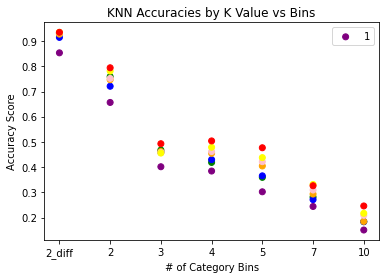

In [20]:

accuracies_df = pd.DataFrame({'stored_buckets':stored_buckets, 'stored_accuracies':stored_accuracies, 'stored_k':stored_k})
colors = {1: 'purple', 2: 'green', 3: 'blue', 5: 'orange', 7: 'pink', 10: 'yellow', 20: 'red'}

plt.scatter(accuracies_df.stored_buckets, accuracies_df.stored_accuracies, c=accuracies_df.stored_k.map(colors))
plt.legend(colors,)
plt.title("KNN Accuracies by K Value vs Bins")
plt.xlabel("# of Category Bins")
plt.ylabel("Accuracy Score")
plt.legend(accuracies_df.stored_k,)

In [21]:
print(accuracies_df.sort_values(['stored_accuracies'], ascending=False).head(10))

   stored_buckets  stored_accuracies  stored_k
35         2_diff           0.934739        10
42         2_diff           0.934739        20
28         2_diff           0.933735         7
7          2_diff           0.931727         2
21         2_diff           0.927711         5
14         2_diff           0.914659         3
0          2_diff           0.853414         1
43              2           0.794177        20
36              2           0.781124        10
8               2           0.759036         2


### NB Model (Doesn't take as long to run)

In [22]:
nb_stored_buckets = []
nb_stored_accuracies = []
nb_stored_k = []

for a in [1.0e-10, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]:
    for i in range(len(train_labels_list)):
        naive_bayes_model1 = BernoulliNB(alpha = a)
        naive_bayes_model1.fit(train_data_temp, train_labels_list[i])

        nb_stored_buckets.append(bucket_list[i])
        nb_stored_accuracies.append(naive_bayes_model1.score(test_data_temp, test_labels_list[i]))
        nb_stored_k.append(a)

        print(f'FOR ALPHA {a}')
        print("bucket size = :" ,bucket_list[i])
        print (f'Bernoulli Model accuracy for alpha {a}: %3.4f' %naive_bayes_model1.score(test_data_temp, test_labels_list[i]))
    print('\n')

FOR ALPHA 1e-10
bucket size = : 2_diff
Bernoulli Model accuracy for alpha 1e-10: 0.9257
FOR ALPHA 1e-10
bucket size = : 2
Bernoulli Model accuracy for alpha 1e-10: 0.2972
FOR ALPHA 1e-10
bucket size = : 3
Bernoulli Model accuracy for alpha 1e-10: 0.4006
FOR ALPHA 1e-10
bucket size = : 4
Bernoulli Model accuracy for alpha 1e-10: 0.1807
FOR ALPHA 1e-10
bucket size = : 5
Bernoulli Model accuracy for alpha 1e-10: 0.1516
FOR ALPHA 1e-10
bucket size = : 7
Bernoulli Model accuracy for alpha 1e-10: 0.1064
FOR ALPHA 1e-10
bucket size = : 10
Bernoulli Model accuracy for alpha 1e-10: 0.0773


FOR ALPHA 0.001
bucket size = : 2_diff
Bernoulli Model accuracy for alpha 0.001: 0.9227
FOR ALPHA 0.001
bucket size = : 2
Bernoulli Model accuracy for alpha 0.001: 0.2972
FOR ALPHA 0.001
bucket size = : 3
Bernoulli Model accuracy for alpha 0.001: 0.3996
FOR ALPHA 0.001
bucket size = : 4
Bernoulli Model accuracy for alpha 0.001: 0.1787
FOR ALPHA 0.001
bucket size = : 5
Bernoulli Model accuracy for alpha 0.001

### Plotting NB Model

   stored_buckets  stored_accuracies      stored_a
0          2_diff           0.925703  1.000000e-10
7          2_diff           0.922691  1.000000e-03
14         2_diff           0.920683  1.000000e-02
21         2_diff           0.916667  1.000000e-01
49         2_diff           0.913655  1.000000e+01
28         2_diff           0.912651  5.000000e-01
35         2_diff           0.910643  1.000000e+00
42         2_diff           0.906627  2.000000e+00
50              2           0.773092  1.000000e+01
36              2           0.758032  1.000000e+00


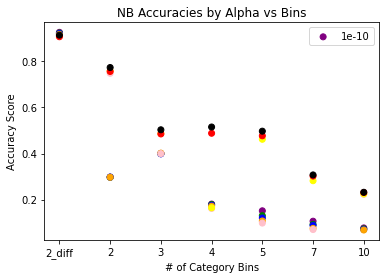

In [87]:
nb_accuracies_df = pd.DataFrame({'stored_buckets':nb_stored_buckets, 'stored_accuracies':nb_stored_accuracies, 'stored_a':nb_stored_k})
colors = {1.0e-10: 'purple', 0.001: 'green', 0.01: 'blue', 0.1: 'orange', 0.5: 'pink',  1.0: 'yellow', 2.0: 'red', 10.0: 'black'}

print(nb_accuracies_df.sort_values(['stored_accuracies'], ascending=False).head(10))

plt.scatter(nb_accuracies_df.stored_buckets, nb_accuracies_df.stored_accuracies, c = nb_accuracies_df.stored_a.map(colors))
# for x, y in zip(nb_accuracies_df.stored_buckets,nb_accuracies_df.stored_accuracies):

#     label = "{:.2f}".format(y)

#     plt.annotate(label,
#                 (x, y),
#                 textcoords = "offset points",
#                 xytext = (3,-10),
#                 ha = 'center')
plt.title("NB Accuracies by Alpha vs Bins")
plt.xlabel("# of Category Bins")
plt.ylabel("Accuracy Score")
plt.legend(nb_accuracies_df.stored_a,) 

### KNN vs NB Mean Score Comparison and Plot

In [85]:
nb_df = nb_accuracies_df.groupby(['stored_buckets']).mean()
knn_df = accuracies_df.groupby(['stored_buckets']).mean()

nb_df['source'] = "NB"
knn_df['source'] = "KNN"

nb_df = nb_df.drop(columns = ['stored_a'])
knn_df = knn_df.drop(columns = ['stored_k'])
# print(knn_df)
# print(nb_df)

final_df = knn_df.append(nb_df)
final_df['colors'] = np.where(final_df['source'] == 'KNN', 'red', 'blue')
final_df = final_df.sort_index(ascending=False)
final_df

,stored_accuracies,source,colors
stored_buckets,,,
7,0.293746,KNN,red
7,0.165537,NB,blue
5,0.395439,KNN,red
5,0.255522,NB,blue
4,0.447504,KNN,red
4,0.254518,NB,blue
3,0.456684,KNN,red
3,0.434362,NB,blue
2_diff,0.918675,KNN,red


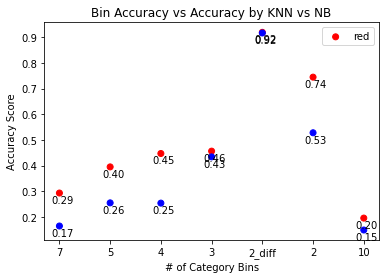

In [86]:

plt.scatter(final_df.index, final_df.stored_accuracies, c = final_df.colors)

for x, y in zip(final_df.index, final_df.stored_accuracies):

    label = "{:.2f}".format(y)

    plt.annotate(label,
                (x, y),
                textcoords = "offset points",
                xytext = (3,-10),
                ha = 'center')
plt.title("Bin Accuracy vs Accuracy by KNN vs NB")
plt.xlabel("# of Category Bins")
plt.ylabel("Accuracy Score")
plt.legend(final_df.colors,)
plt.show()

### Single Image Prediction For Our Pets

In [49]:
images = ['IMG_5422.jpg', 'IMG_5423.JPG', 'IMG_5424.JPG', 'alex_cat.jpg', 'allison_dog.jpeg','IMG_5428.jpg']

image_path = '/Users/madelinewhitlow/Desktop/MIDS_W207/petfinder-pawpularity-score/our_pets/'

our_pets = []
for img in images:
    x = image_path + img
    x = Image.open(x).convert("RGB").resize((50,50))
    x = img_to_array(x)/255
    our_pets.append(x)
our_pets = np.array(our_pets)

In [106]:
our_pets_temp = our_pets.reshape(6,50*50*3)
train_data_temp.shape
test_predicted_labels = knnmodel.predict(test_data_temp)
plt.histogram(test_predicted_labels)

AttributeError: module 'matplotlib.pyplot' has no attribute 'histogram'

In [96]:
knnmodel = KNeighborsClassifier(n_neighbors=7)
knnmodel.fit(train_data_temp, train_labels_raw2)
test_predicted_labels = knnmodel.predict(test_data_temp)
print("bucket size = :" ,10)
print("accuracy with k=", k, " : ", metrics.accuracy_score(test_labels_raw2, test_predicted_labels))
knnmodel.predict(our_pets_temp)


bucket size = : 10
accuracy with k= 20  :  0.7700803212851406


array([0, 0, 0, 0, 0, 0])

In [97]:
knnmodel = KNeighborsClassifier(n_neighbors=7)
knnmodel.fit(train_data_temp, train_labels_raw10)
test_predicted_labels = knnmodel.predict(test_data_temp)
print("bucket size = :" ,10)
print("accuracy with k=", k, " : ", metrics.accuracy_score(test_labels_raw10, test_predicted_labels))

knnmodel.predict(our_pets_temp)
#Image.open(image_path +images[3]).resize((250,250))

bucket size = : 10
accuracy with k= 20  :  0.21385542168674698


array([2, 3, 2, 1, 2, 2])

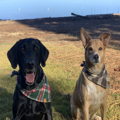

In [105]:
Image.open(image_path + images[2]).convert("RGB").resize((120,120))

In [ ]:
Image.open(image_path + images[3]).convert("RGB").resize((120,120))